# Importing library

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [37]:
df=pd.read_csv('products.csv')
df

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


# Looking at first few rows

In [38]:
df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Looking at last few rows

In [39]:
df.tail()

,product_id,product_name,aisle_id,department_id
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


# Checking how many row and column

In [40]:
df.shape

(49688, 4)

# Checking columns

In [41]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

# Checking dataset info

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


# Getting statistics for numeric column

In [43]:
df.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


# Checking missing values

In [44]:
df.isnull().sum()

,0
product_id,0
product_name,0
aisle_id,0
department_id,0


# Checking unique values

In [45]:
df.nunique()

,0
product_id,49688
product_name,49688
aisle_id,134
department_id,21


# Check first 10 rows by department id

In [46]:
df.sort_values(by='department_id').head(10)

,product_id,product_name,aisle_id,department_id
49666,49667,Enchilada with Spanish Rice & Beans Meal,38,1
35,36,Traditional Lasagna with Meat Sauce Savory Ita...,38,1
15387,15388,Orange Flavored Ice Cubes,37,1
15386,15387,Eggo Cinnamon French Toast Bites,52,1
7768,7769,Chicken Little Jamm Sliders,38,1
15263,15264,Snickers Ice Cream Bar,37,1
49572,49573,That's My Jam™ Core Ice Cream,37,1
49603,49604,Beef and Bean Green Chili Burritos,38,1
49672,49673,Stone Baked Multi Grain Artisan Rolls,129,1
49635,49636,Vegetable & Chicken Dumpling,129,1


# Finding number of products per department

In [47]:
df.groupby('department_id')['product_id'].count()

,product_id
department_id,
1,4007
2,548
3,1516
4,1684
5,1054
6,1139
7,4365
8,972
9,1858


# Average name length per department in ascending order

In [48]:
df['name_length'] = df['product_name'].apply(len)
df.groupby('department_id')['name_length'].mean().sort_values()


,name_length
department_id,
4,20.341449
5,21.162239
10,22.184211
20,25.075643
3,25.341689
6,25.728709
12,25.836825
13,27.144480
2,29.169708


# Distribution of departments

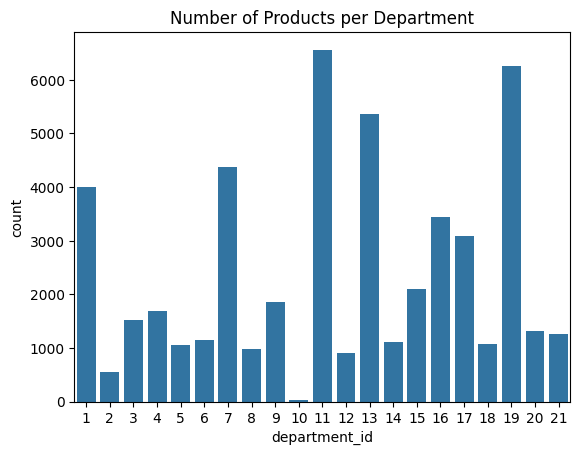

In [49]:
sns.countplot(x='department_id',data=df)
plt.title("Number of Products per Department")
plt.show()

# Data relationships [Aisle vs Department]

In [50]:
pd.crosstab(df['aisle_id'], df['department_id'])


department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
aisle_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,146,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,271,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,832,0,0
4,0,0,0,0,0,0,0,0,543,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,409,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0,0,0,0,0,0,0,0,0,0,...,0,0,303,0,0,0,0,0,0,0
131,0,0,0,0,0,0,0,0,457,0,...,0,0,0,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
